In [1]:
#create artficial dataset with features age - numerical, height - numerical, gender - categorical (m/w/d) and predict health risk - ordinal (low, medium, high)
np.random.seed(42)
n = 1000
age = np.random.randint(18,100,n)
height = np.random.randint(140,210,n)
gender = np.random.choice(["m","w","d"],n)
#calculate continuous health risk
health_risk =  0.3*np.array([1 if g == "w" else 0 for g in gender]) + 0.05*np.random.randn(n) + 0.6*age/100 + 0.1*height/200
#transform continuous health risk to ordinal health risk
health_risk = pd.qcut(health_risk,3,labels=[0,1,2])
df = pd.DataFrame({"age":age,"height":height, "gender":gender, "health_risk":health_risk})
df.to_csv("data/dummy.csv",index=False,sep=";")


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\wankm\Projects\ordinal_xai\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3579, in run_code
  File "C:\Users\wankm\AppData\Local\Temp\ipykernel_15928\798335219.py", line 2, in <module>
    np.random.seed(42)
    ^^
NameError: name 'np' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\wankm\Projects\ordinal_xai\venv\Lib\site-packages\pygments\styles\__init__.py", line 45, in get_style_by_name
ModuleNotFoundError: No module named 'pygments.styles.default'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\wankm\Projects\ordinal_xai\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 2170, in showtraceback
  File "c:\Users\wankm\Projects\ordinal_xai\venv\Lib\site-packages\IPython\core\ultratb.py", line 1457, in structured_traceback
  File "c:\Users\wankm\

In [5]:
from models.CLM import CLM
X,y = load_data("dummy.csv")

model = load_model("CLM",link_function="logit")

model.fit(X,y)

y_pred = model.predict(X)

y_prob = model.predict_proba(X)

y_pred,y_prob

model.params_




array([ 5.26940835,  0.37036894, -0.06415992, 10.62216765, -0.28741469,
        1.91846704])

In [6]:
model.predict(X)

array([2, 0, 2, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 2, 1, 0, 1, 0, 2, 2, 2, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       2, 0, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 0, 2, 1, 2, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 2, 2, 2,
       1, 0, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 2, 1, 0,
       0, 1, 2, 0, 1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 0, 1, 2, 1, 1, 2, 0, 0, 1, 0, 1, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 2, 2, 1, 2, 2, 1, 0,
       2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 0, 1, 0, 0, 2, 1, 0, 2, 2, 2, 1,
       1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 2, 2, 1, 0, 1,
       2, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 1, 1, 2, 1,
       0, 0, 0, 1, 0, 1, 0, 2, 0, 2, 1, 2, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0,
       2, 2, 1, 1, 2, 1, 1, 0, 0, 1, 2, 0, 1, 0, 2,

In [1]:
import numpy as np
# Create simple test data
y_true = np.array([0, 1, 2, 1, 0])
y_perfect_pred_proba = np.array([
    [1.0, 0.0, 0.0],  # Class 0
    [0.0, 1.0, 0.0],  # Class 1
    [0.0, 0.0, 1.0],  # Class 2
    [0.0, 1.0, 0.0],  # Class 1
    [1.0, 0.0, 0.0]   # Class 0
])
y_perfect_pred = y_perfect_pred_proba.argmax(axis=1)
y_worst_pred_proba = np.array([
    [0.0, 0.0, 1.0],  # Class 2
    [1.0, 0.0, 0.0],  # Class 0
    [1.0, 0.0, 0.0],  # Class 0
    [0.0, 0.0, 1.0],  # Class 2
    [0.0, 0.0, 1.0]   # Class 2
])
y_worst_pred = y_worst_pred_proba.argmax(axis=1)
y_uncertain_pred_proba = np.array([
    [0.5, 0.3, 0.2],  # Class 0
    [0.2, 0.5, 0.3],  # Class 1
    [0.1, 0.2, 0.7],  # Class 2
    [0.3, 0.4, 0.3],  # Class 1
    [0.8, 0.1, 0.1]   # Class 0
])
y_uncertain_pred = y_uncertain_pred_proba.argmax(axis=1)
y_one_error_pred_proba = np.array([
    [1.0, 0.0, 0.0],  # Class 0
    [0.0, 1.0, 0.0],  # Class 1
    [0.0, 0.0, 1.0],  # Class 2
    [0.0, 1.0, 0.0],  # Class 1
    [0.0, 0.0, 1.0]   # Class 0
])
y_one_error_pred = y_one_error_pred_proba.argmax(axis=1)

In [1]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Generate features
# 5 standard informative features
informative_features = {
    f'X_inf_{i}': np.random.normal(0, 1, n_samples) for i in range(5)
}

# 2 interaction-only informative features
interaction_features = {
    f'X_inter_{i}': np.random.normal(0, 1, n_samples) for i in range(2)
}
interaction_term = interaction_features['X_inter_0'] * interaction_features['X_inter_1']

# 3 features that only affect specific rank borders
border_features = {
    f'X_border_{i}': np.random.normal(0, 1, n_samples) for i in range(3)
}

# 20 noise features (now normally distributed)
noise_features = {
    f'X_noise_{i}': np.random.normal(0, 1, n_samples) for i in range(20)
}

# Correlated features
# Very strong correlation with X_inf_0
X_corr_strong = informative_features['X_inf_0'] + np.random.normal(0, 0.05, n_samples)
X_corr_strong = (X_corr_strong - np.mean(X_corr_strong)) / np.std(X_corr_strong)

# Very weak correlation with X_inf_1
X_corr_weak = informative_features['X_inf_1'] + np.random.normal(0, 2.0, n_samples)
X_corr_weak = (X_corr_weak - np.mean(X_corr_weak)) / np.std(X_corr_weak)

# Latent variable with standard linear informative features
latent = (2.0 * informative_features['X_inf_0']
          - 1.5 * informative_features['X_inf_1']
          + 1.2 * informative_features['X_inf_2']
          - 0.7 * informative_features['X_inf_3']
          + 0.5 * informative_features['X_inf_4']
          + np.random.normal(0, 0.7, n_samples))

# Add interaction term effect across all samples
latent += 2.0 * interaction_term

# Add border-specific effects
latent_adjusted = latent.copy()
latent_adjusted[(latent > -1.5) & (latent <= 0)] += 1.5 * border_features['X_border_0'][(latent > -1.5) & (latent <= 0)]
latent_adjusted[(latent > 0) & (latent <= 1.5)] += 1.5 * border_features['X_border_1'][(latent > 0) & (latent <= 1.5)]
latent_adjusted[(latent > 1.5) & (latent <= 3)] += 1.5 * border_features['X_border_2'][(latent > 1.5) & (latent <= 3)]

# Define thresholds for 5 classes
thresholds = [-np.inf, -1.5, 0, 1.5, 3, np.inf]

# Assign ordinal categories
y = np.digitize(latent_adjusted, thresholds) - 1

# Combine all features into a DataFrame
data = pd.DataFrame({**informative_features, **interaction_features, **border_features, **noise_features})
data['X_corr0_strong'] = X_corr_strong
data['X_corr1_weak'] = X_corr_weak
data['y'] = y

# Save to CSV
data.to_csv('data/FI_test.csv', index=False, sep=';')

print(data.head())



    X_inf_0   X_inf_1   X_inf_2   X_inf_3   X_inf_4  X_inter_0  X_inter_1  \
0  0.496714  1.399355 -0.675178 -1.907808 -0.863494  -0.423760  -1.114081   
1 -0.138264  0.924634 -0.144519 -0.860385 -0.031203  -0.453414  -0.630931   
2  0.647689  0.059630 -0.792420 -0.413606  0.018017  -1.795643  -0.942060   
3  1.523030 -0.646937 -0.307962  1.887688  0.472630  -0.330090  -0.547996   
4 -0.234153  0.698223 -1.893615  0.556553 -1.366858   0.732829  -0.214150   

   X_border_0  X_border_1  X_border_2  ...  X_noise_13  X_noise_14  \
0    0.785185   -0.033025    0.765402  ...    2.198837   -0.671374   
1   -1.777681   -0.503650    1.073413  ...    0.343355   -0.713799   
2    0.714746   -0.172375    0.498690  ...   -0.233590    1.425406   
3   -0.233724    0.714732   -1.942498  ...    0.976983    1.864414   
4    0.707458    1.277857   -0.155422  ...    0.842069   -0.928882   

   X_noise_15  X_noise_16  X_noise_17  X_noise_18  X_noise_19  X_corr0_strong  \
0    0.170874   -0.141343   -0.7837

In [12]:
#simple version
n_samples=1000
# Generate features
# 5 standard normal features
features = {
    f'X_{i}': np.random.normal(0, 1, n_samples) for i in range(5)
}

latent = 3 * features["X_0"] - 2 * features["X_1"] - features["X_2"] + np.random.normal(0,1,n_samples) # 4 and 5 are noise
# Define thresholds for 5 classes
thresholds = [-np.inf, -1.5, 0, 1.5, 3, np.inf] 

# Assign ordinal categories
y = np.digitize(latent, thresholds) - 1

data = pd.DataFrame({**features})
data["y"] = y
# Save to CSV
data.to_csv('data/FI_simple.csv', index=False, sep=';')

print(data.head()) 



        X_0       X_1       X_2       X_3       X_4  y
0  0.960895 -0.875781  0.038162  1.261745  0.193257  4
1 -0.369965  0.434668 -0.585079  0.007531 -0.292425  0
2 -0.579581 -0.193942  0.296729  2.066886  0.466237  0
3  0.933312  0.784308  1.124690  0.849618 -1.607576  2
4 -2.731540 -1.300966 -0.298190  0.574162  1.104704  0


In [3]:
import numpy as np
from utils.evaluation_metrics import cem,_calculate_proximity,_get_class_counts

y_true = np.array([0, 1, 2, 1, 0])
y_pred = np.array([2, 0, 0, 2, 2])

cem(y_true,y_true)









1.0

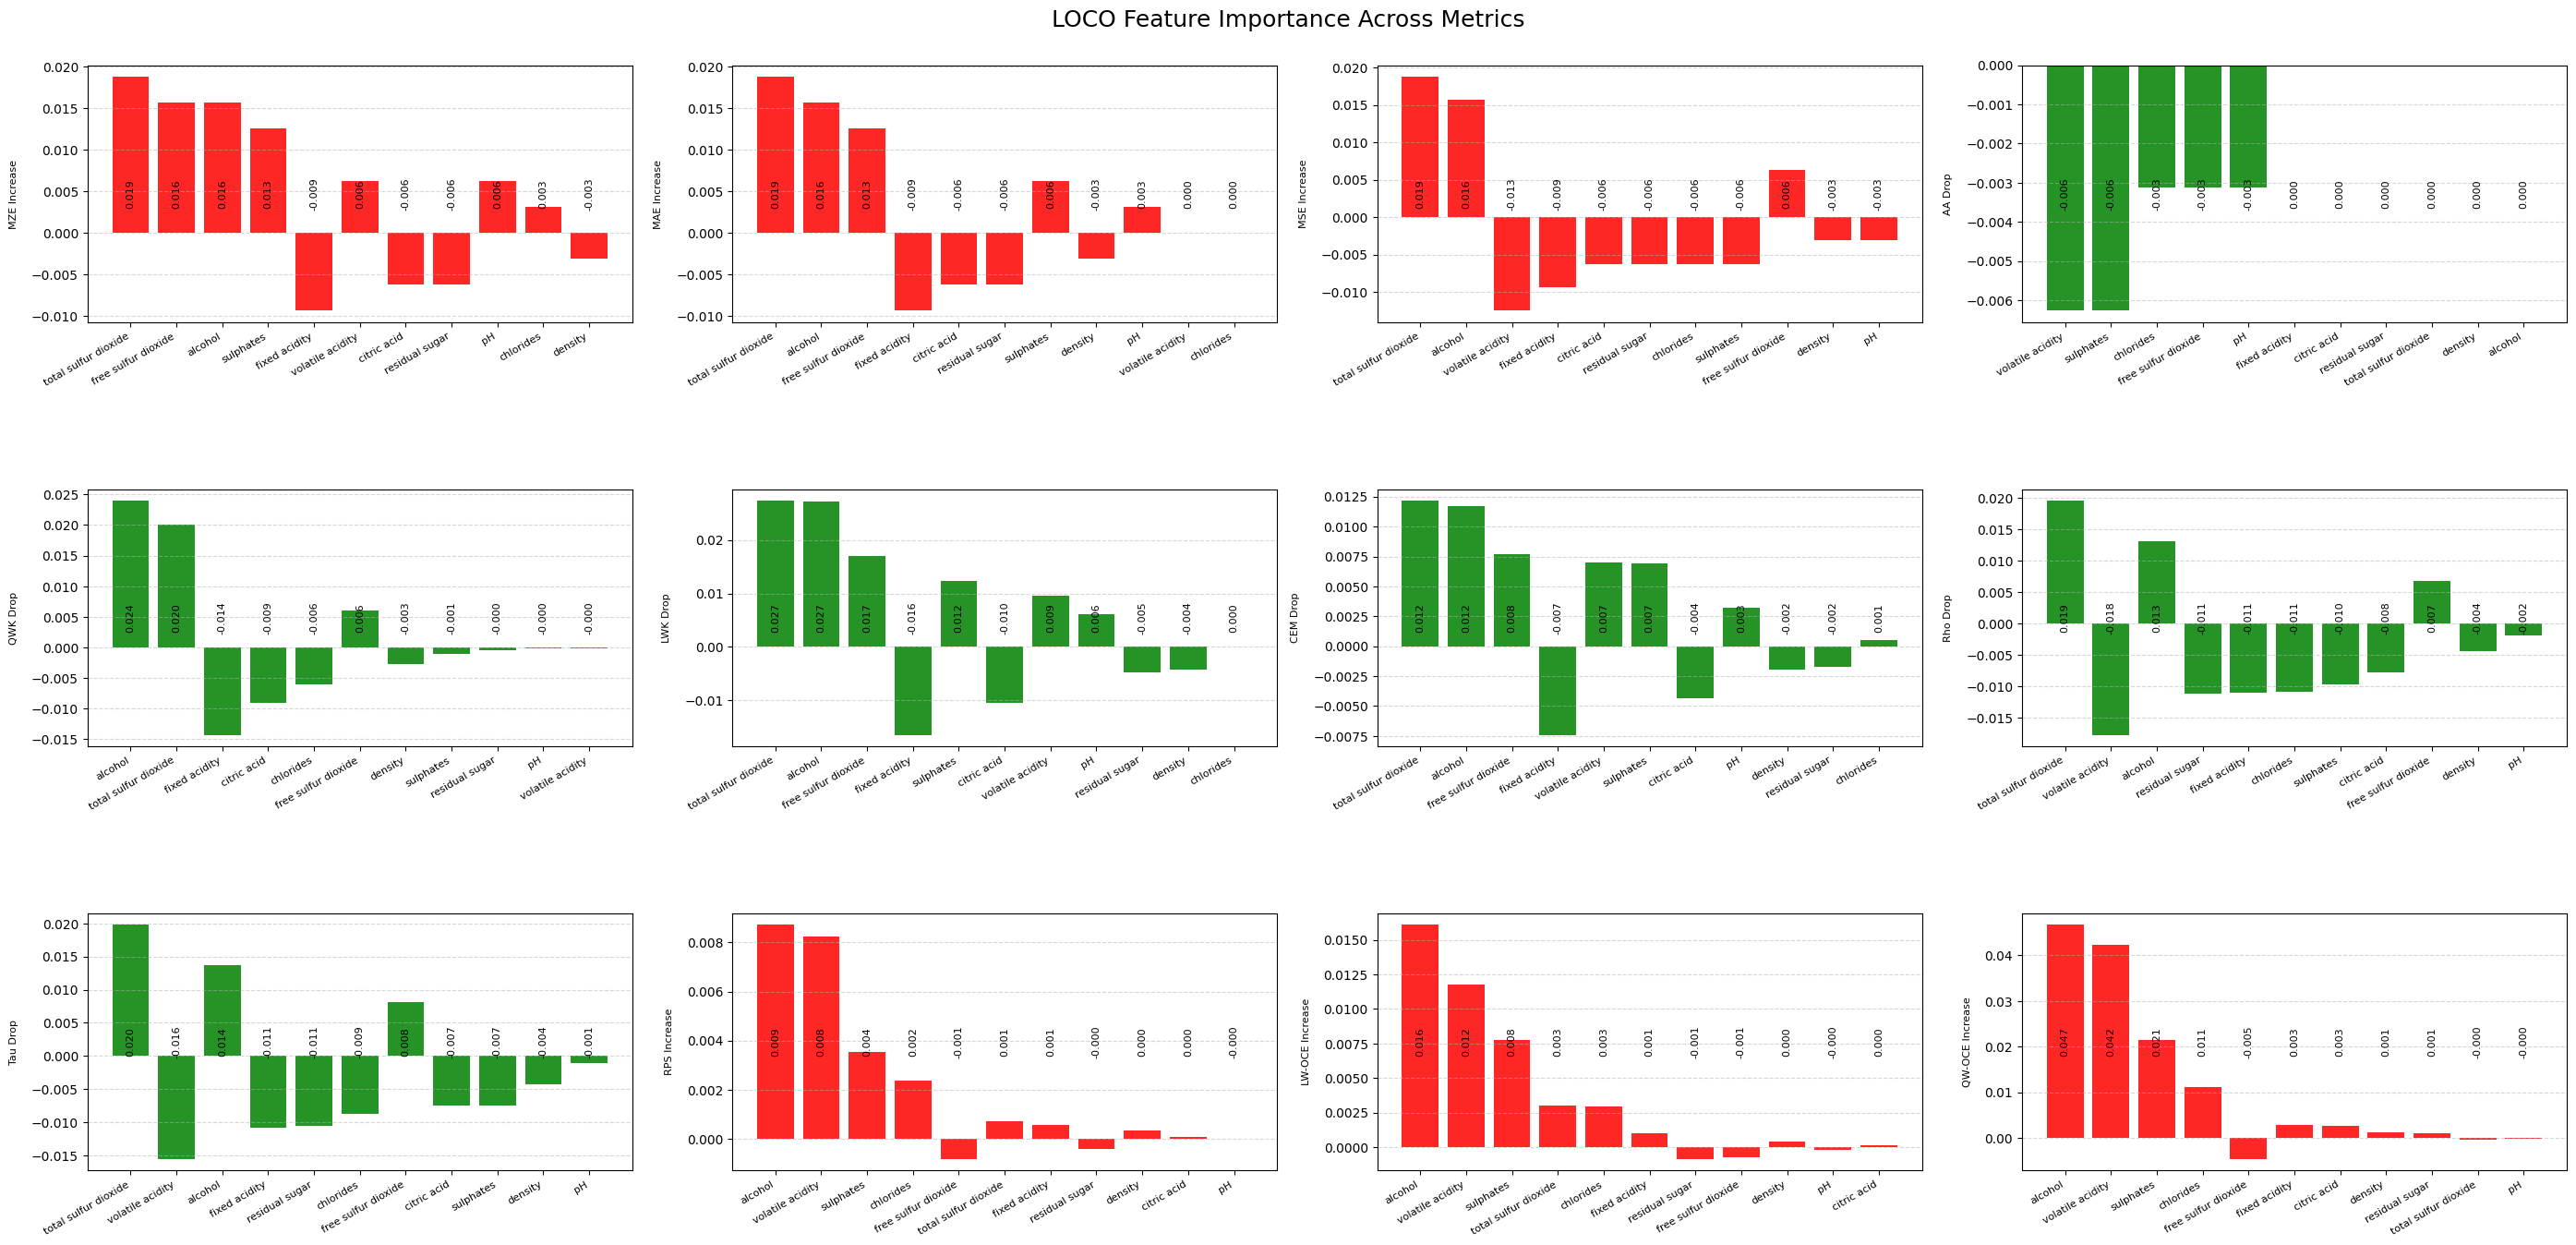

{'feature_importance': {'fixed acidity': {'mze': -0.009375000000000022,
   'mae': -0.009375000000000022,
   'mse': -0.009375000000000022,
   'adjacent_accuracy': 0.0,
   'weighted_kappa_quadratic': -0.014250673354816445,
   'weighted_kappa_linear': -0.016392110259318082,
   'cem': -0.0073973398786181255,
   'spearman_correlation': -0.011074521358994949,
   'kendall_tau': -0.01082066832976697,
   'ranked_probability_score': 0.0005634476483443174,
   'ordinal_weighted_ce_linear': 0.0010183575771599562,
   'ordinal_weighted_ce_quadratic': 0.002718147398771853},
  'volatile acidity': {'mze': 0.006249999999999978,
   'mae': 0.0,
   'mse': -0.012500000000000067,
   'adjacent_accuracy': -0.006249999999999978,
   'weighted_kappa_quadratic': -0.00010907449971675476,
   'weighted_kappa_linear': 0.009493151200619998,
   'cem': 0.006965169171662899,
   'spearman_correlation': -0.017707564405754772,
   'kendall_tau': -0.015537917247358313,
   'ranked_probability_score': 0.008238356598125163,
   'or

In [1]:
from sklearn import metrics
from interpretation.LIME import LIME
from interpretation.LOCO import LOCO
from interpretation.PermutationImportance import PermutationImportance

from main import load_data, load_model

X,y = load_data("winequality-red.csv")

model = load_model("CLM",link_function="logit")

model.fit(X,y)

loco = LOCO(model,X,y,metrics=["mse","ranked_probability_score"])
loco.explain(plot=True)














